In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [2]:
import json

# read files ilp

res_ilp = []

for limit in range(20,280,20):
    with open(f"../ilp_output/batch_size_8_different_limits/different_limit_{limit}.json") as f:
        d = json.load(f)
        res_ilp.append(d)

# read files ilp with special bw calculations

res_ilp_bw = []

for limit in range(20,280,20):
    with open(f"../ilp_bw_output/batch_size_8_different_limits/different_limit_{limit}.json") as f:
        d = json.load(f)
        res_ilp_bw.append(d)



In [3]:
# average cost scheduled separately

last_limit = res_ilp[-1]
sum_cost_separately = 0
for run in last_limit:
    sum_cost_separately += run["total_cost_separated"]
avg_cost_separately = sum_cost_separately / len(run)
print(avg_cost_separately)


0.07004880000000001


In [4]:
# no feasible solution found

failed_ilp = []

for limit in res_ilp:
    failed_ilp.append(0)
    for run in limit:
        if run["status"] == 5:
            failed_ilp[-1] += 1

print(failed_ilp)

failed_ilp_bw = []

for limit in res_ilp_bw:
    failed_ilp_bw.append(0)
    for run in limit:
        if run["status"] == 5:
            failed_ilp_bw[-1] += 1

print(failed_ilp_bw)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# average cost

average_ilp = []
average_ilp_complete = []

for limit in res_ilp:
    average_ilp_complete.append(None)
    average_ilp.append(None)
    num_feasible = 0
    for run in limit:
        if run["status"] == 5:
            continue
        if average_ilp[-1] is None:
            average_ilp[-1] = run["total_cost"]
            num_feasible += 1
        else:
            average_ilp[-1] += run["total_cost"]
            num_feasible += 1
    if not average_ilp[-1] is None:
        average_ilp[-1] = average_ilp[-1] / num_feasible
    if num_feasible == len(limit): 
        average_ilp_complete[-1] = average_ilp[-1]

print(average_ilp_complete)
print(average_ilp)

average_ilp_bw = []
average_ilp_bw_complete = []

for limit in res_ilp_bw:
    average_ilp_bw.append(None)
    average_ilp_bw_complete.append(None)
    num_feasible = 0
    for run in limit:
        if run["status"] == 5:
            continue
        if average_ilp_bw[-1] is None:
            average_ilp_bw[-1] = run["total_cost"]
            num_feasible += 1
        else:
            average_ilp_bw[-1] += run["total_cost"]
            num_feasible += 1
    if not average_ilp_bw[-1] is None:
        average_ilp_bw[-1] = average_ilp_bw[-1] / num_feasible
    if num_feasible == len(limit):
        average_ilp_bw_complete[-1] = average_ilp_bw[-1]




[None, None, None, None, 0.05544150125000001, 0.051884274285714294, 0.051884274285714294, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429]
[0.060294884166666673, 0.05672420333333334, 0.05656580333333334, 0.056500103333333336, 0.05544150125000001, 0.051884274285714294, 0.051884274285714294, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429, 0.05181812428571429]


In [6]:
result_snowflake_ilp = {}
with open(f"../ilp_output/batch_size_8_different_limits_snowflake/different_limit_20.json") as f:
    result_snowflake_ilp = json.load(f)

result_snowflake_ilp_bw = {}
with open(f"../ilp_bw_output/batch_size_8_different_limits_snowflake/different_limit_20.json") as f:
    result_snowflake_ilp_bw = json.load(f)

average_snowflake_ilp = 0
average_snowflake_ilp_bw = 0

for run in result_snowflake_ilp:
    average_snowflake_ilp += run["total_cost"]


for run in result_snowflake_ilp_bw:
    average_snowflake_ilp_bw += run["total_cost"]

average_snowflake_ilp = average_snowflake_ilp / len(result_snowflake_ilp)
average_snowflake_ilp_bw = average_snowflake_ilp_bw / len(result_snowflake_ilp_bw)

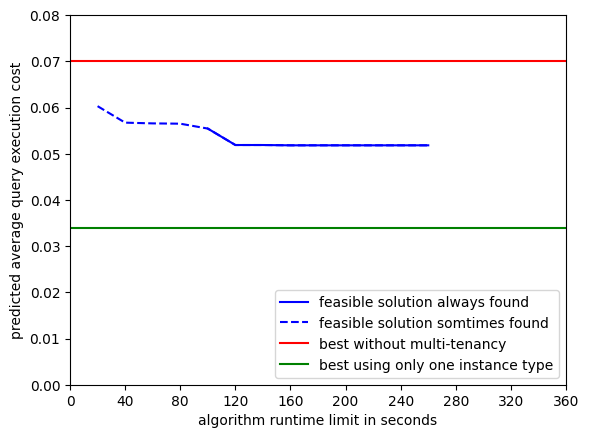

In [7]:
limits = np.arange(20,280,20)
xticks = np.arange(0,400,40)
yticks = np.arange(0, 0.09, 0.01)

plt.plot(limits, average_ilp_complete, 'b-', label='feasible solution always found')
plt.plot(limits, average_ilp, 'b--', label='feasible solution somtimes found')
plt.axhline(y=avg_cost_separately, color='r', linestyle='-', label='best without multi-tenancy')
plt.axhline(y=average_snowflake_ilp, color='g', linestyle='-', label='best using only one instance type')
plt.xlabel("algorithm runtime limit in seconds")
plt.ylabel("predicted average query execution cost")
plt.legend(loc="lower right")
plt.xticks(xticks)
plt.yticks(yticks)
plt.show()

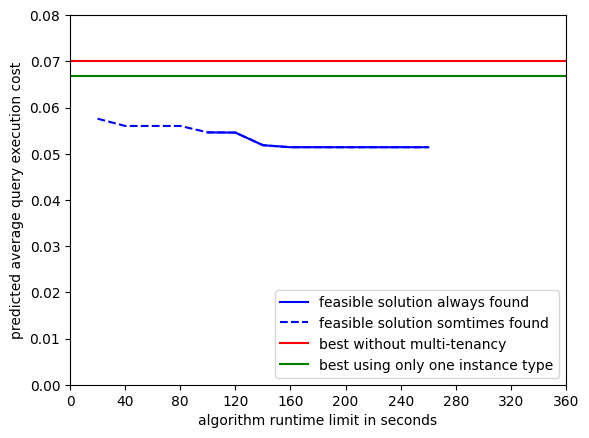

In [9]:
limits = np.arange(20,280,20)
xticks = np.arange(0,400,40)
yticks = np.arange(0, 0.09, 0.01)

plt.plot(limits, average_ilp_bw_complete, 'b-', label='feasible solution always found')
plt.plot(limits, average_ilp_bw, 'b--', label='feasible solution somtimes found')
plt.axhline(y=avg_cost_separately, color='r', linestyle='-', label='best without multi-tenancy')
plt.axhline(y=average_snowflake_ilp_bw, color='g', linestyle='-', label='best using only one instance type')
plt.xlabel("algorithm runtime limit in seconds")
plt.ylabel("predicted average query execution cost")
plt.legend(loc="lower right")
plt.xticks(xticks)
plt.yticks(yticks)
plt.show()